# 0. 환경 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
from IPython.display import Image
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/content/drive/My Drive/프로젝트/데이콘-직업/data')

# 1. 데이터 불러오기

In [4]:
know_2017=pd.read_csv('./train/KNOW_2017.csv',na_values=' ')
know_2017.head()

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,aq6_1,aq6_2,aq7_1,aq7_2,aq8_1,aq8_2,aq9_1,aq9_2,aq10_1,aq10_2,aq11_1,aq11_2,aq12_1,aq12_2,aq13_1,aq13_2,aq14_1,aq14_2,aq15_1,aq15_2,aq16_1,aq16_2,aq17_1,aq17_2,aq18_1,aq18_2,aq19_1,aq19_2,aq20_1,...,bq18_4,bq18_5,bq18_6,bq18_7,bq19,bq19_1,bq20,bq21,bq22,bq23,bq24_1,bq24_2,bq24_3,bq24_4,bq24_5,bq24_6,bq24_7,bq24_8,bq25,bq26,bq27,bq28,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq38,bq38_1,bq39_1,bq39_2,bq40,bq41_1,bq41_2,bq41_3,knowcode
0,0,3,3.0,3,3.0,3,3.0,4,4.0,3,4.0,3,3.0,2,2.0,2,2.0,2,2.0,3,3.0,3,3.0,4,4.0,3,3.0,3,2.0,3,3.0,5,6.0,5,6.0,4,5.0,2,2.0,5,...,3,2,3,3,2,생산설비의 자동화로,2,3,5,10.0,1,1,1,2,2,2,2,2,3,3,4,3,2,없다,없다,없다,건설현장 노무직,없다,4,1,52,2,실업,1,1,1.0,4000.0,NaN,2200.0,825101
1,1,4,5.0,4,5.0,3,4.0,3,4.0,3,4.0,1,NaN,1,NaN,1,NaN,1,NaN,2,3.0,3,4.0,3,4.0,4,5.0,2,2.0,3,4.0,3,4.0,3,4.0,3,4.0,1,NaN,2,...,4,2,2,4,2,건설 수주가 없어서,3,3,6,50.0,2,2,2,2,2,2,2,2,4,3,4,3,2,없다,"매타기, 드라이버, 가위, CAD",NaN,NaN,NaN,2,1,38,4,건축공학,1,1,1.0,NaN,NaN,2400.0,140204
2,2,3,4.0,3,4.0,3,4.0,5,6.0,4,5.0,1,NaN,1,NaN,3,4.0,3,4.0,3,4.0,1,NaN,3,4.0,3,4.0,1,NaN,3,4.0,3,4.0,3,4.0,3,4.0,3,4.0,3,...,4,2,2,4,2,신축 건설경기가 좋지 않아서,3,2,5,40.0,2,2,2,2,2,2,2,2,4,4,4,2,2,없다,"건축설계표, 오토캐드, 파이프, 보일러",NaN,NaN,NaN,2,1,50,4,건축공학,1,1,1.0,4000.0,NaN,2400.0,140204
3,3,3,3.0,3,3.0,3,5.0,4,5.0,4,6.0,3,5.0,3,4.0,4,5.0,5,5.0,4,5.0,3,4.0,4,5.0,3,5.0,3,4.0,4,4.0,3,4.0,2,2.0,4,4.0,4,2.0,4,...,3,2,2,3,1,"업무량 감소, 자동화로 인해서",4,2,6,30.0,2,1,1,2,1,1,1,1,3,4,4,4,4,지적기사,"토탈스테이션, SZP",무,지적공무원,NaN,4,1,42,4,환경학과,1,1,1.0,7000.0,NaN,3500.0,140601
4,4,4,5.0,3,4.0,3,4.0,4,5.0,3,4.0,1,NaN,1,NaN,1,NaN,1,NaN,3,4.0,2,2.0,3,4.0,3,4.0,1,NaN,3,4.0,3,4.0,3,4.0,3,4.0,1,NaN,2,...,4,2,2,4,2,부동산 거품 빠지면서 건축 경기도 덩달아 불황,3,2,3,40.0,2,2,2,2,2,2,2,2,4,3,4,3,3,없다,"캐드, 엑셀, 건축도면",NaN,NaN,NaN,2,1,51,4,건축공학,1,1,1.0,4000.0,NaN,2500.0,140204


In [5]:
know_2017_test=pd.read_csv('./test/KNOW_2017_test.csv',na_values=' ')
know_2017_test.head()

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,aq5_2,aq6_1,aq6_2,aq7_1,aq7_2,aq8_1,aq8_2,aq9_1,aq9_2,aq10_1,aq10_2,aq11_1,aq11_2,aq12_1,aq12_2,aq13_1,aq13_2,aq14_1,aq14_2,aq15_1,aq15_2,aq16_1,aq16_2,aq17_1,aq17_2,aq18_1,aq18_2,aq19_1,aq19_2,aq20_1,...,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq19,bq19_1,bq20,bq21,bq22,bq23,bq24_1,bq24_2,bq24_3,bq24_4,bq24_5,bq24_6,bq24_7,bq24_8,bq25,bq26,bq27,bq28,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq38,bq38_1,bq39_1,bq39_2,bq40,bq41_1,bq41_2,bq41_3
0,0,3,4.0,2,2.0,3,3.0,1,NaN,3,5.0,1,NaN,3,4.0,3,4.0,3,3.0,4,5.0,2,2.0,2,3.0,2,3.0,4,6.0,4,6.0,1,NaN,1,NaN,1,NaN,4,5.0,1,...,3,4,3,2,3,3,다른것으로 대체할 수 없는 업무,2,3,1,0.0,2,2,2,2,2,2,2,2,3,4,3,2,1,없다,컴퓨터,없다,없다,없다,2,2,26,3,비서학,1,1,1.0,3000.0,NaN,2300.0
1,1,5,5.0,3,5.0,5,5.0,5,5.0,4,5.0,4,5.0,5,5.0,5,5.0,4,6.0,4,5.0,4,5.0,4,4.0,4,5.0,4,5.0,4,5.0,4,6.0,5,6.0,4,5.0,5,4.0,5,...,2,4,3,4,4,2,제조업이 줄어들 것으로 생각되기 때문,2,2,4,30.0,2,2,2,2,2,2,2,2,4,5,4,3,1,없다,"제품검사시스템,PC,엑셀",없다,없다,NaN,3,1,57,4,농화학,1,1,1.0,5500.0,NaN,2500.0
2,2,5,5.0,5,4.0,5,4.0,1,NaN,1,NaN,3,4.0,3,4.0,3,4.0,4,4.0,3,4.0,5,4.0,5,3.0,4,4.0,5,6.0,4,5.0,1,NaN,1,NaN,1,NaN,3,4.0,1,...,3,3,2,2,3,2,1인 미디어 증가,2,3,1,10.0,1,1,1,1,2,2,2,2,4,5,4,2,2,없다,"오디션(편집프로그램), 나홀로(방송진행장비)",없다,"광선, 홍보 담당자","1인 미디어, 팟캐스트 제작/진행자",3,1,31,4,신문방송,1,1,1.0,4300.0,NaN,4000.0
3,3,4,5.0,5,6.0,4,6.0,3,4.0,4,5.0,4,6.0,4,5.0,4,6.0,4,5.0,4,5.0,1,NaN,3,4.0,4,5.0,1,NaN,4,5.0,4,5.0,4,5.0,2,3.0,4,5.0,1,...,2,2,2,3,3,3,선호직업 아님,2,3,1,2.0,1,1,1,2,2,2,2,2,4,4,3,4,3,없다,컴퓨터,없다,없다,없다,2,1,35,6,화학,1,1,1.0,4100.0,NaN,3000.0
4,4,5,6.0,4,5.0,4,5.0,1,NaN,1,NaN,1,NaN,3,3.0,5,6.0,5,7.0,3,3.0,1,NaN,1,NaN,3,3.0,1,NaN,3,3.0,1,NaN,1,NaN,1,NaN,4,4.0,1,...,2,3,3,2,3,3,잡지를 위한 정보나 뉴스는 고갈되지 않기 때문에 꾸준히 유지될 것이다,2,3,1,15.0,2,1,2,2,2,2,2,2,4,3,3,3,3,편집기자,"뉴스, 원고, PC",사진작가,리포터,없다,3,1,36,4,광고홍보,1,1,1.0,2800.0,NaN,2000.0


# 2. EDA

## 데이터 type 분포

In [6]:
print('학습용 데이터 type 분포')
know_2017[know_2017.columns[1:]].dtypes.value_counts()

학습용 데이터 type 분포


int64      94
float64    50
object     11
dtype: int64

In [7]:
print('평가용 데이터 type 분포')
know_2017_test[know_2017_test.columns[1:]].dtypes.value_counts() #label 컬럼이 하나 없다.

평가용 데이터 type 분포


int64      93
float64    50
object     11
dtype: int64

## Target Column - knowcode 파악

In [8]:
print("데이터 target column(상위 5개) 분포")
print(know_2017['knowcode'].value_counts()[:5])

데이터 target column(상위 5개) 분포
9999999    382
212101     137
211101     106
301004      78
214301      62
Name: knowcode, dtype: int64


9999999 : 해당년도 코드값이 부여되지 않은 직업이다.

212101 : 중, 고등학교 교사

211101 : 판사

301004 : 간호사

314301 : 기술, 기능계 강사

In [9]:
job_top5=['9999999','212101','211101','301004','214301']

Text(0, 0.5, 'Count')

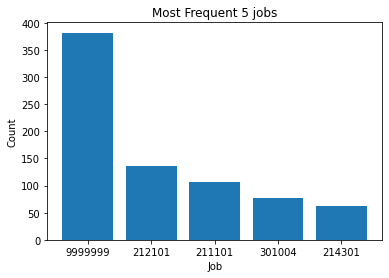

In [10]:
plt.bar(job_top5,know_2017['knowcode'].value_counts()[:5])
plt.title('Most Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

In [11]:
print("데이터 target column(하위 5개) 분포")
print(know_2017['knowcode'].value_counts()[-5:])

데이터 target column(하위 5개) 분포
864201    15
561101    15
522202    15
221201    15
813101    15
Name: knowcode, dtype: int64


864201 : 신발 제조기계 조작원

561101 : 청소원

522202 : 열차 객실 승무원

221201 : 대학 시간 강사

813101 : 금형원

In [12]:
job_low5=['864201','561101','522202','221201','813101']

Text(0, 0.5, 'Count')

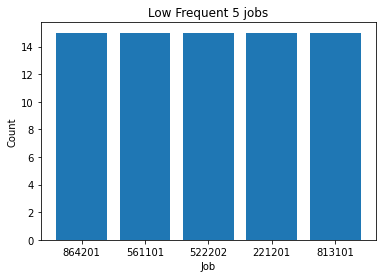

In [13]:
plt.bar(job_low5,know_2017['knowcode'].value_counts()[-5:])
plt.title('Low Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

## aq 간 상관관계

In [14]:
columns=know_2017.columns[1:-1][:82]
columns

Index(['aq1_1', 'aq1_2', 'aq2_1', 'aq2_2', 'aq3_1', 'aq3_2', 'aq4_1', 'aq4_2',
       'aq5_1', 'aq5_2', 'aq6_1', 'aq6_2', 'aq7_1', 'aq7_2', 'aq8_1', 'aq8_2',
       'aq9_1', 'aq9_2', 'aq10_1', 'aq10_2', 'aq11_1', 'aq11_2', 'aq12_1',
       'aq12_2', 'aq13_1', 'aq13_2', 'aq14_1', 'aq14_2', 'aq15_1', 'aq15_2',
       'aq16_1', 'aq16_2', 'aq17_1', 'aq17_2', 'aq18_1', 'aq18_2', 'aq19_1',
       'aq19_2', 'aq20_1', 'aq20_2', 'aq21_1', 'aq21_2', 'aq22_1', 'aq22_2',
       'aq23_1', 'aq23_2', 'aq24_1', 'aq24_2', 'aq25_1', 'aq25_2', 'aq26_1',
       'aq26_2', 'aq27_1', 'aq27_2', 'aq28_1', 'aq28_2', 'aq29_1', 'aq29_2',
       'aq30_1', 'aq30_2', 'aq31_1', 'aq31_2', 'aq32_1', 'aq32_2', 'aq33_1',
       'aq33_2', 'aq34_1', 'aq34_2', 'aq35_1', 'aq35_2', 'aq36_1', 'aq36_2',
       'aq37_1', 'aq37_2', 'aq38_1', 'aq38_2', 'aq39_1', 'aq39_2', 'aq40_1',
       'aq40_2', 'aq41_1', 'aq41_2'],
      dtype='object')

In [15]:
columns=columns[range(0,82,2)]
columns

Index(['aq1_1', 'aq2_1', 'aq3_1', 'aq4_1', 'aq5_1', 'aq6_1', 'aq7_1', 'aq8_1',
       'aq9_1', 'aq10_1', 'aq11_1', 'aq12_1', 'aq13_1', 'aq14_1', 'aq15_1',
       'aq16_1', 'aq17_1', 'aq18_1', 'aq19_1', 'aq20_1', 'aq21_1', 'aq22_1',
       'aq23_1', 'aq24_1', 'aq25_1', 'aq26_1', 'aq27_1', 'aq28_1', 'aq29_1',
       'aq30_1', 'aq31_1', 'aq32_1', 'aq33_1', 'aq34_1', 'aq35_1', 'aq36_1',
       'aq37_1', 'aq38_1', 'aq39_1', 'aq40_1', 'aq41_1'],
      dtype='object')

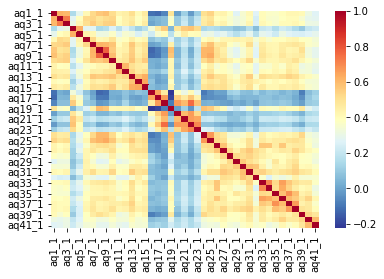

In [16]:
sns.heatmap(know_2017[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## 산업 유형 (bq1)

In [17]:
know_2017['bq1'].value_counts()

3     1793
18     972
13     953
15     843
16     732
19     673
17     622
6      560
7      431
8      429
10     375
11     288
14     224
9      212
1      157
4      106
5       47
12      29
2       22
20      14
21       4
Name: bq1, dtype: int64

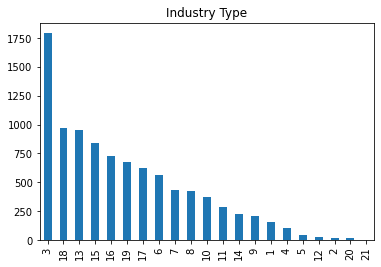

In [18]:
know_2017['bq1'].value_counts().plot.bar(title='Industry Type')

산업 유형이 3인 사람들의 직업 코드의 분포를 보겠다.

In [19]:
know_2017[know_2017['bq1']==3]['knowcode'].value_counts()[:10]

9999999    88
415101     41
415202     38
612101     32
816103     30
152101     29
157101     25
12201      22
415404     17
825201     17
Name: knowcode, dtype: int64

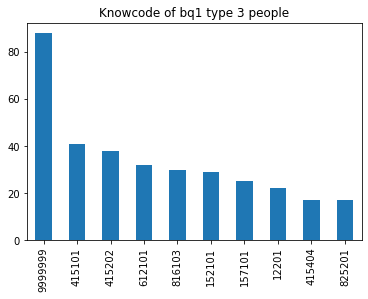

In [20]:
know_2017[know_2017['bq1']==3]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 3 people')

타입 3은 제조업이었다.

415101 - 제품 디자이너

415202 - 패션소품 디자이너

612101 - 기술영업원

816103 - 일반기계조립원

152101 - 재료 공학 기술자

12201 - 경영지원관리자

제조업이라 제조와 관련된 직업이 나름 있다고 볼 수 있다.

산업 유형이 18인 사람들의 직업 코드의 분포를 보겠다.

In [21]:
know_2017[know_2017['bq1']==18]['knowcode'].value_counts()[:10]

9999999    80
420201     37
24402      29
415404     21
521304     18
414201     17
414401     16
414701     16
420202     16
420401     16
Name: knowcode, dtype: int64

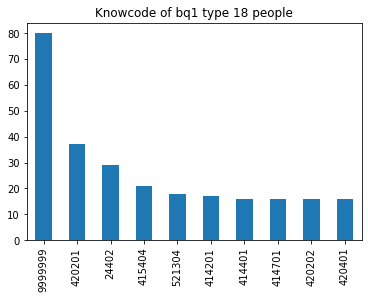

In [22]:
know_2017[know_2017['bq1']==18]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 18 people')

타입 18은 예술, 스포츠 및 여가관련 서비스업이다.

420201 : 직업 운동선수

24402 : 공연·영화 및 음반 기획자

415404 : 시각 디자이너

521304 : 여행 안내원

414201 : 사진 작가 및 사진사

산업 유형과 직업군이 꽤 관련이 있다.

산업 유형이 13인 사람들의 직업 코드의 분포를 보겠다.

In [23]:
know_2017[know_2017['bq1']==13]['knowcode'].value_counts()[:10]

140201     18
9999999    17
24203      16
132002     16
133201     15
23301      15
152101     15
151108     15
158501     15
155203     14
Name: knowcode, dtype: int64

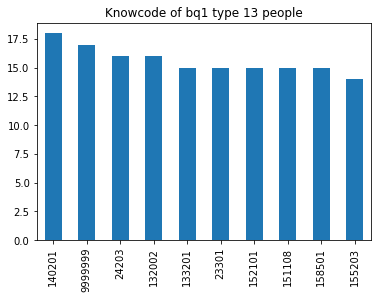

In [24]:
know_2017[know_2017['bq1']==13]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 13 people')

타입 13은 전문, 과학 및 기술 서비스업이다.

140201: 건축 구조 기술사

24203 : 조사전문가

132002 : 컴퓨터시스템 설계 및 분석가

23301 : 관세사

152101 : 재료공학 기술자

산업 유형과 직업군이 꽤 관련이 있다.

bq1의 유형과 직업코드를 비교하여 보았을 때 꽤 큰 관련이 있고 knowcode 예측에 중요한 변수로 작용할 것이라고 추측할 수 있다.

## 근무업체 유형(bq2)

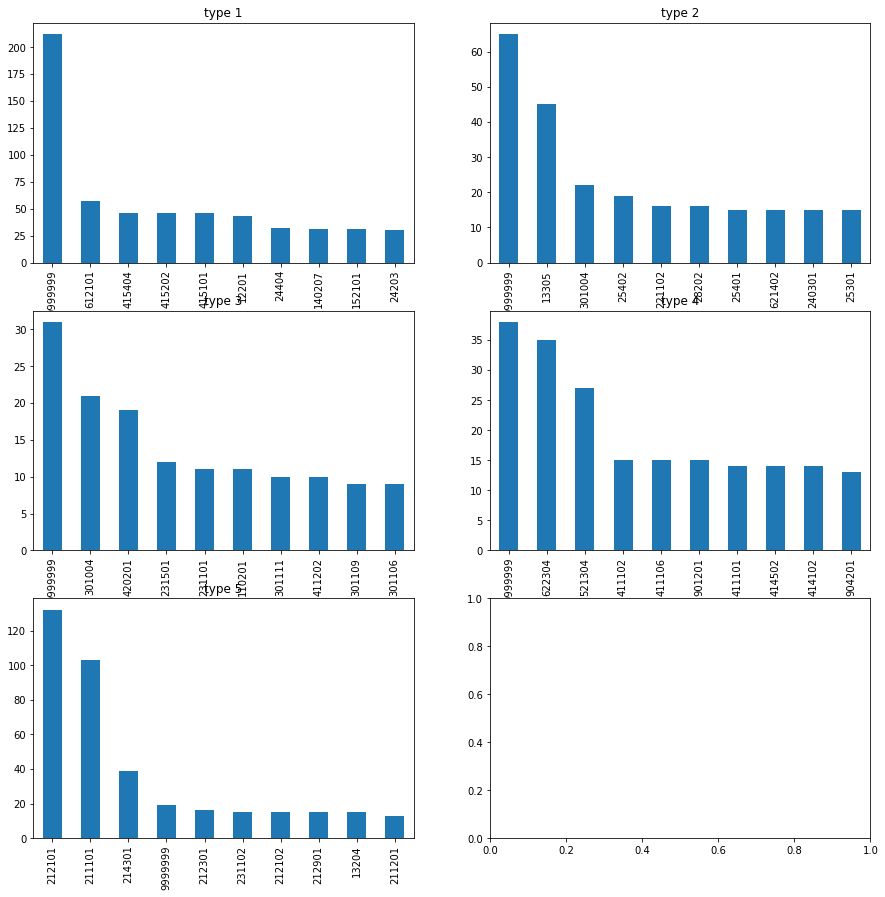

In [25]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/2)
  col=i%2
  know_2017[know_2017['bq2']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 유형에 따라서도 knowcode의 경향은 많이 달라지는 걸 확인할 수 있다.

## 근무업체 규모(bq3)

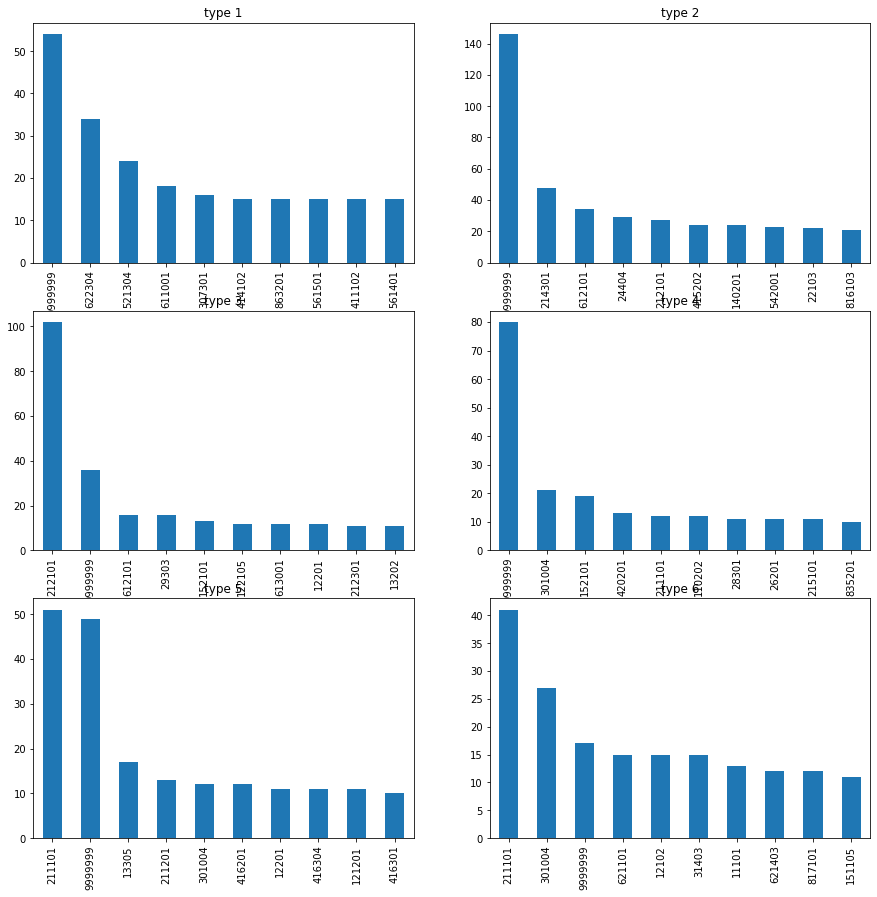

In [26]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/2)
  col=i%2
  know_2017[know_2017['bq3']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 규모에 따라서는 공통적으로 많이 존재하는 knowcode가 주로 등장하고 선택한 선지에 따라서는 크게 차이가 없어 보인다.

## 요구훈련 기간(bq5_1)

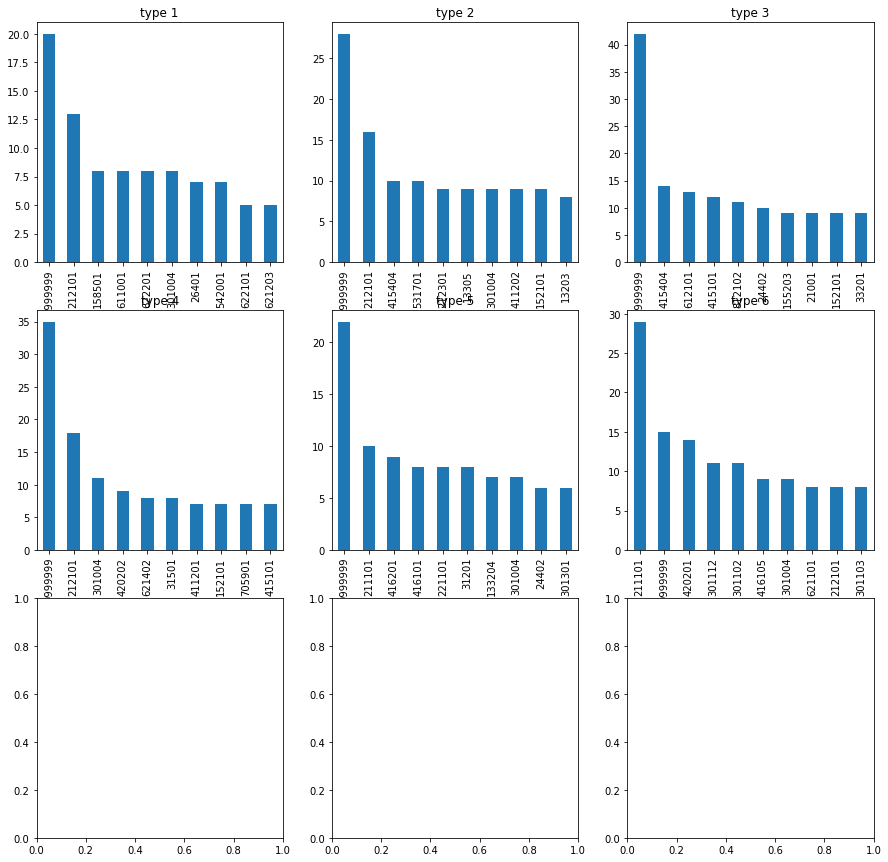

In [27]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq5_1']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

요구 훈련기간 따라서는 유의미한 분류를 할 수 있을 것으로 보인다.

다만 9999999나 212101과 같이 많이 존재하는 직업코드는 많이 존재하기에 이것을 잘 분류하는 게 중요한 것으로 보인다.

## 교육수준 (bq 7)

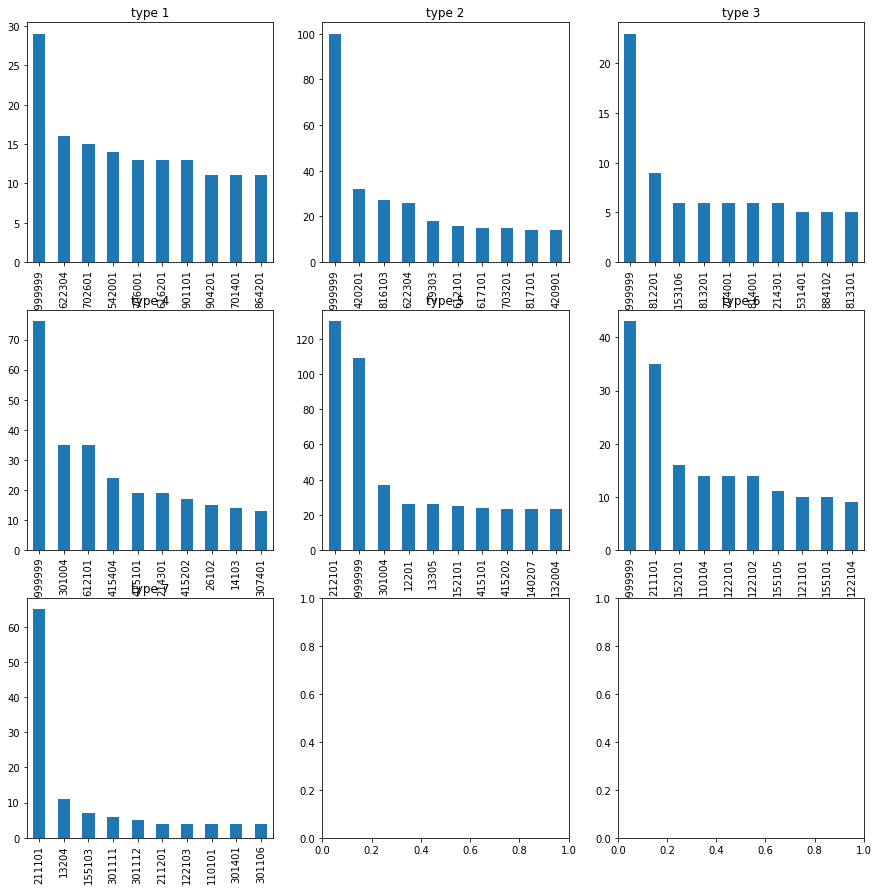

In [28]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,8)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq7']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 직업 안정성(bq 9) 

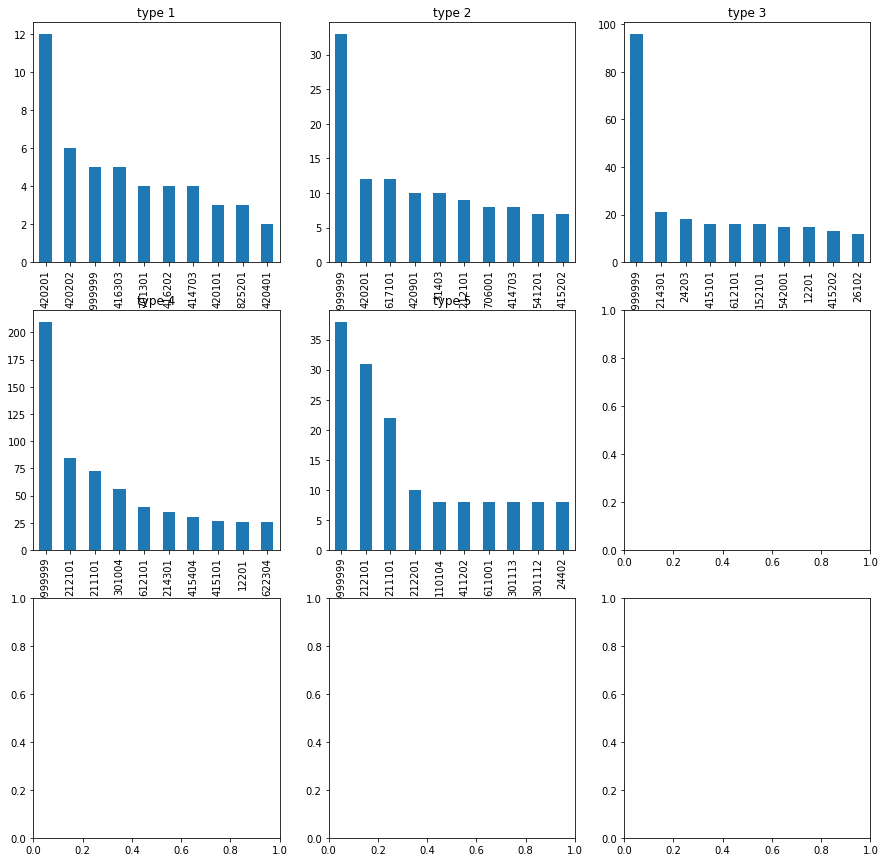

In [29]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq9']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 근무조건 (bq 11)

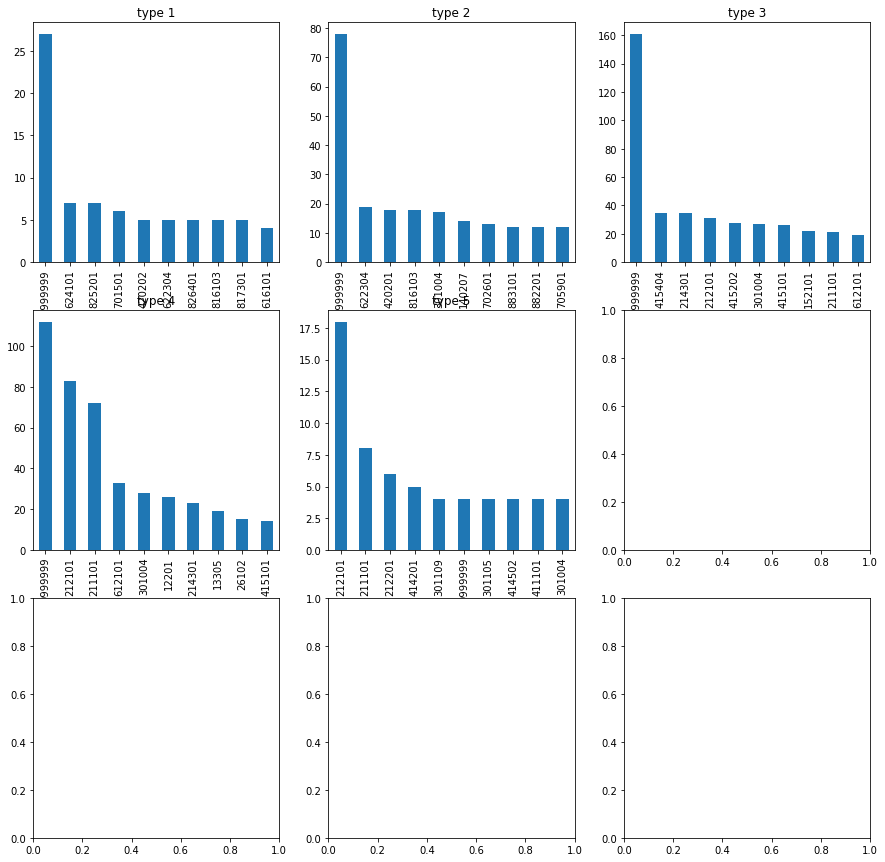

In [30]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq11']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 직무 만족(bq 14)

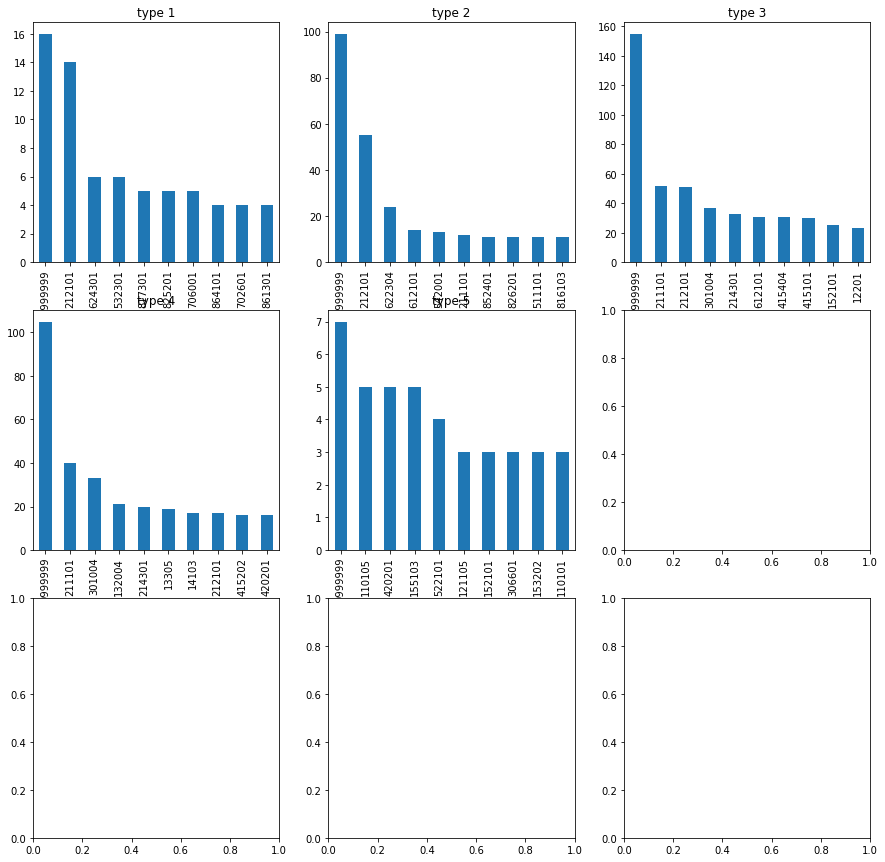

In [31]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq14']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 향후 일자리 변화(bq19)

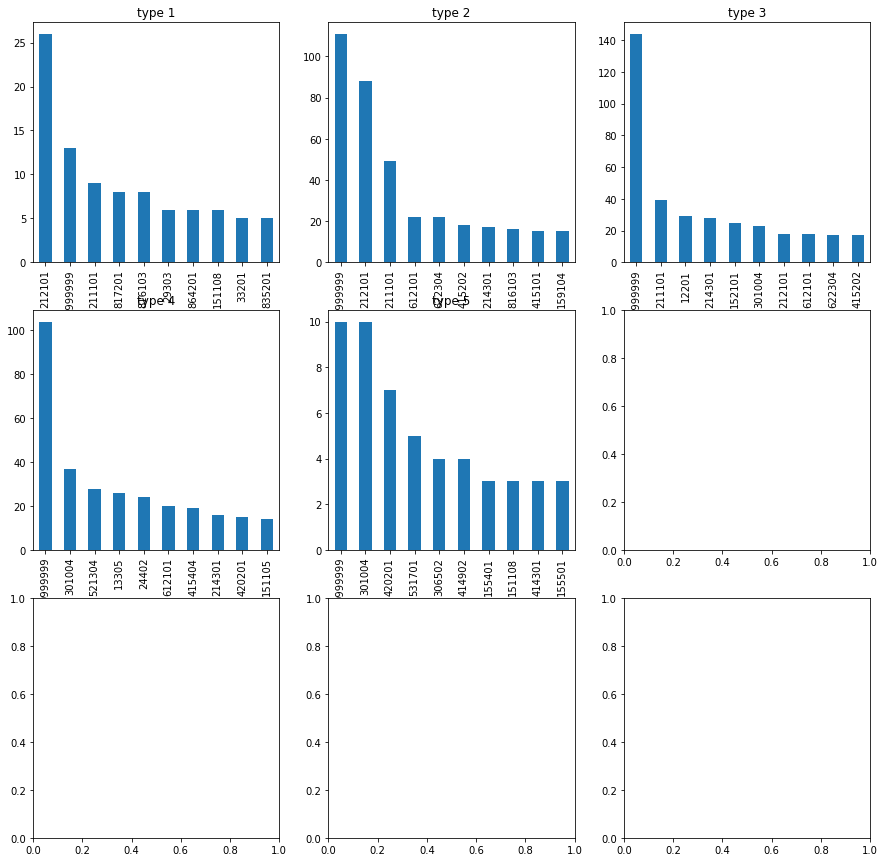

In [32]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq19']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 변화요인에 따른 일자리 변화 (bq 21)

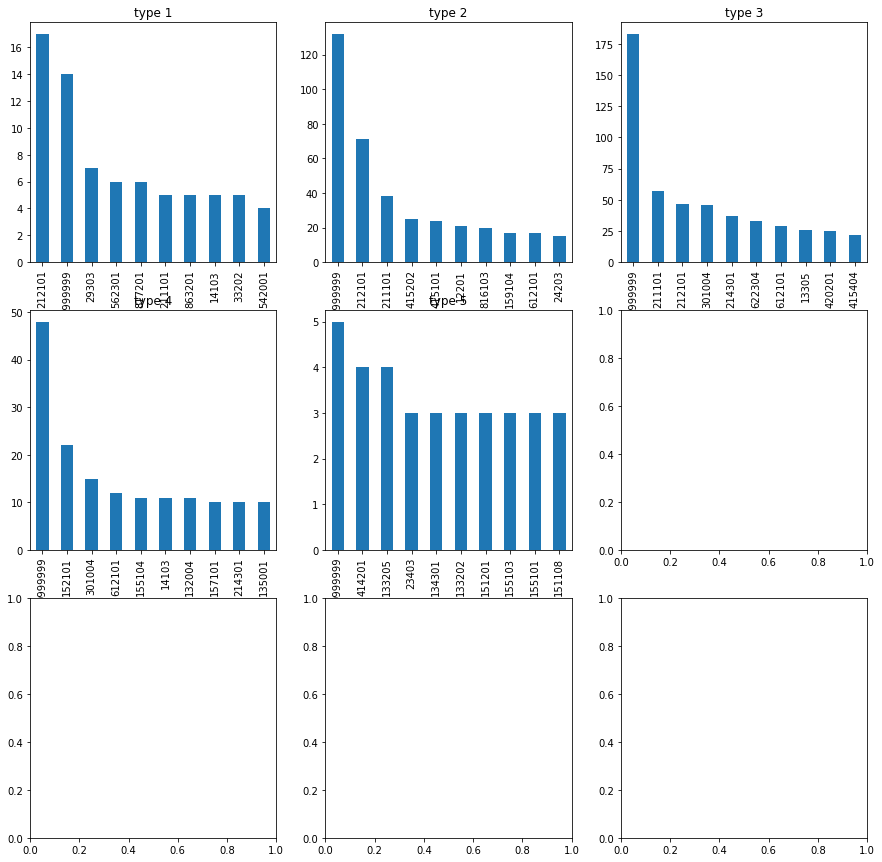

In [33]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq21']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 최종학력(bq 38)

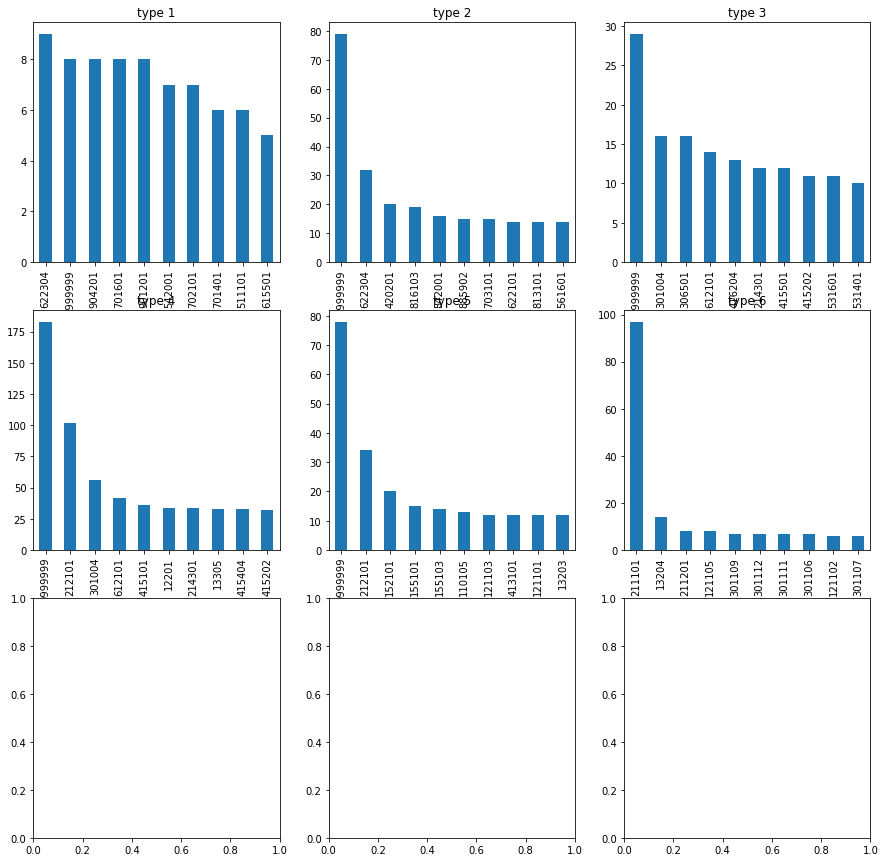

In [34]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq38']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 계약형태 (bq 40)

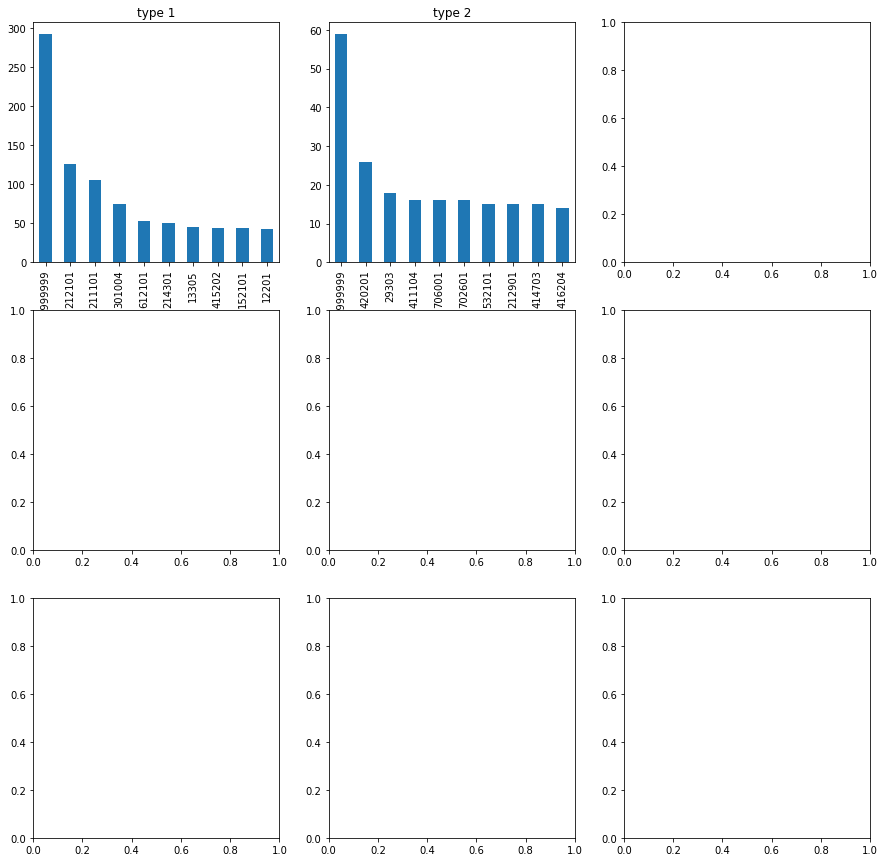

In [35]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,3)):
  row=int(i/3)
  col=i%3
  know_2017[know_2017['bq40']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

# 3. 데이터 전처리

## 3.1 결측치 파악

In [36]:
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
aq1_1 : 0 / aq1_1 : 0 / 0
aq1_2 : 585 / aq1_2 : 598 / 1183
aq2_1 : 0 / aq2_1 : 0 / 0
aq2_2 : 861 / aq2_2 : 862 / 1723
aq3_1 : 0 / aq3_1 : 0 / 0
aq3_2 : 843 / aq3_2 : 785 / 1628
aq4_1 : 0 / aq4_1 : 0 / 0
aq4_2 : 3118 / aq4_2 : 3099 / 6217
aq5_1 : 0 / aq5_1 : 0 / 0
aq5_2 : 2282 / aq5_2 : 2170 / 4452
aq6_1 : 0 / aq6_1 : 0 / 0
aq6_2 : 1676 / aq6_2 : 1612 / 3288
aq7_1 : 0 / aq7_1 : 0 / 0
aq7_2 : 1537 / aq7_2 : 1470 / 3007
aq8_1 : 0 / aq8_1 : 0 / 0
aq8_2 : 1606 / aq8_2 : 1546 / 3152
aq9_1 : 0 / aq9_1 : 0 / 0
aq9_2 : 1396 / aq9_2 : 1352 / 2748
aq10_1 : 0 / aq10_1 : 0 / 0
aq10_2 : 942 / aq10_2 : 908 / 1850
aq11_1 : 0 / aq11_1 : 0 / 0
aq11_2 : 2745 / aq11_2 : 2742 / 5487
aq12_1 : 0 / aq12_1 : 0 / 0
aq12_2 : 1064 / aq12_2 : 1076 / 2140
aq13_1 : 0 / aq13_1 : 0 / 0
aq13_2 : 1445 / aq13_2 : 1436 / 2881
aq14_1 : 0 / aq14_1 : 0 / 0
aq14_2 : 1550 / aq14_2 : 1535 / 3085
aq15_1 : 0 / aq15_1 : 0 / 0
aq15_2 : 764 / aq15_2 : 771 / 1535
aq16_1 : 0 / aq16_1 : 0 / 0
aq16_2 : 1871 / aq16_

## 3.2 결측치 처리

aq1_2 와 같은 것들은 그전 질문에서 2번 문항을 스킵할 수 있는 선지들을 고른 사람들에 의한 결측치였다.

중요하지 않다고 선택한 설문지에 대한 값들은 0으로 대체하겠다.

그 칼럼들은 aq1_2 ~ aq41_2


### aq 결측치 처리

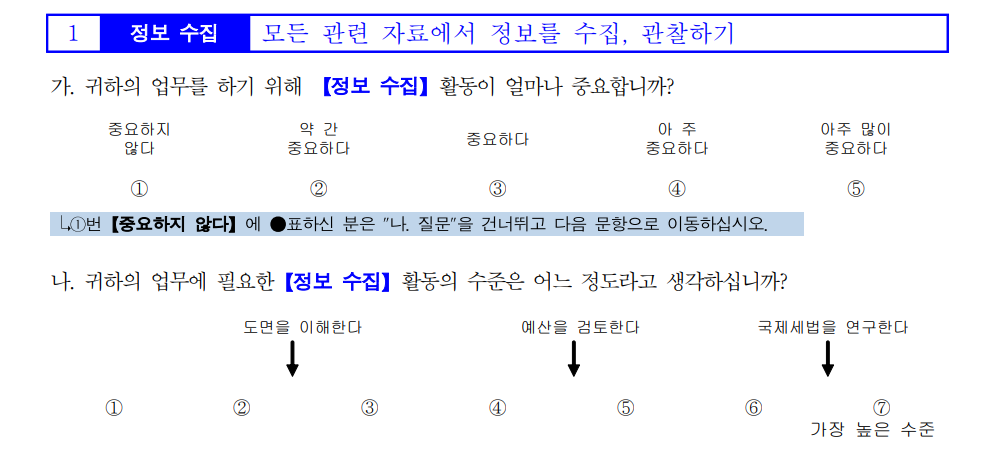

In [37]:
Image('./image/2017aq1_2.PNG')

In [38]:
# aq1_1부터 aq41_2까지 칼럼 뽑기
columns=know_2017.columns[1:-1][:82]
columns

Index(['aq1_1', 'aq1_2', 'aq2_1', 'aq2_2', 'aq3_1', 'aq3_2', 'aq4_1', 'aq4_2',
       'aq5_1', 'aq5_2', 'aq6_1', 'aq6_2', 'aq7_1', 'aq7_2', 'aq8_1', 'aq8_2',
       'aq9_1', 'aq9_2', 'aq10_1', 'aq10_2', 'aq11_1', 'aq11_2', 'aq12_1',
       'aq12_2', 'aq13_1', 'aq13_2', 'aq14_1', 'aq14_2', 'aq15_1', 'aq15_2',
       'aq16_1', 'aq16_2', 'aq17_1', 'aq17_2', 'aq18_1', 'aq18_2', 'aq19_1',
       'aq19_2', 'aq20_1', 'aq20_2', 'aq21_1', 'aq21_2', 'aq22_1', 'aq22_2',
       'aq23_1', 'aq23_2', 'aq24_1', 'aq24_2', 'aq25_1', 'aq25_2', 'aq26_1',
       'aq26_2', 'aq27_1', 'aq27_2', 'aq28_1', 'aq28_2', 'aq29_1', 'aq29_2',
       'aq30_1', 'aq30_2', 'aq31_1', 'aq31_2', 'aq32_1', 'aq32_2', 'aq33_1',
       'aq33_2', 'aq34_1', 'aq34_2', 'aq35_1', 'aq35_2', 'aq36_1', 'aq36_2',
       'aq37_1', 'aq37_2', 'aq38_1', 'aq38_2', 'aq39_1', 'aq39_2', 'aq40_1',
       'aq40_2', 'aq41_1', 'aq41_2'],
      dtype='object')

In [39]:
for index in range(0,82,2):
  col=columns[index]
  before=col
  after = col[:-1] + str((int(col[-1])+1))
  print(before, after)
  know_2017.loc[(know_2017[after].isnull()) & (know_2017[before].notnull()) & (know_2017[before] == (sorted(know_2017[before].unique()))[0]), after] = 0
  know_2017_test.loc[(know_2017_test[after].isnull()) & (know_2017_test[before].notnull()) & (know_2017_test[before] == (sorted(know_2017_test[before].unique()))[0]), after] = 0

aq1_1 aq1_2
aq2_1 aq2_2
aq3_1 aq3_2
aq4_1 aq4_2
aq5_1 aq5_2
aq6_1 aq6_2
aq7_1 aq7_2
aq8_1 aq8_2
aq9_1 aq9_2
aq10_1 aq10_2
aq11_1 aq11_2
aq12_1 aq12_2
aq13_1 aq13_2
aq14_1 aq14_2
aq15_1 aq15_2
aq16_1 aq16_2
aq17_1 aq17_2
aq18_1 aq18_2
aq19_1 aq19_2
aq20_1 aq20_2
aq21_1 aq21_2
aq22_1 aq22_2
aq23_1 aq23_2
aq24_1 aq24_2
aq25_1 aq25_2
aq26_1 aq26_2
aq27_1 aq27_2
aq28_1 aq28_2
aq29_1 aq29_2
aq30_1 aq30_2
aq31_1 aq31_2
aq32_1 aq32_2
aq33_1 aq33_2
aq34_1 aq34_2
aq35_1 aq35_2
aq36_1 aq36_2
aq37_1 aq37_2
aq38_1 aq38_2
aq39_1 aq39_2
aq40_1 aq40_2
aq41_1 aq41_2


In [40]:
#대체 후 다시 결측치 파악
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
aq1_1 : 0 / aq1_1 : 0 / 0
aq1_2 : 0 / aq1_2 : 0 / 0
aq2_1 : 0 / aq2_1 : 0 / 0
aq2_2 : 0 / aq2_2 : 0 / 0
aq3_1 : 0 / aq3_1 : 0 / 0
aq3_2 : 0 / aq3_2 : 0 / 0
aq4_1 : 0 / aq4_1 : 0 / 0
aq4_2 : 0 / aq4_2 : 0 / 0
aq5_1 : 0 / aq5_1 : 0 / 0
aq5_2 : 0 / aq5_2 : 0 / 0
aq6_1 : 0 / aq6_1 : 0 / 0
aq6_2 : 0 / aq6_2 : 0 / 0
aq7_1 : 0 / aq7_1 : 0 / 0
aq7_2 : 0 / aq7_2 : 0 / 0
aq8_1 : 0 / aq8_1 : 0 / 0
aq8_2 : 0 / aq8_2 : 0 / 0
aq9_1 : 0 / aq9_1 : 0 / 0
aq9_2 : 0 / aq9_2 : 0 / 0
aq10_1 : 0 / aq10_1 : 0 / 0
aq10_2 : 0 / aq10_2 : 0 / 0
aq11_1 : 0 / aq11_1 : 0 / 0
aq11_2 : 4 / aq11_2 : 6 / 10
aq12_1 : 0 / aq12_1 : 0 / 0
aq12_2 : 0 / aq12_2 : 0 / 0
aq13_1 : 0 / aq13_1 : 0 / 0
aq13_2 : 0 / aq13_2 : 0 / 0
aq14_1 : 0 / aq14_1 : 0 / 0
aq14_2 : 3 / aq14_2 : 9 / 12
aq15_1 : 0 / aq15_1 : 0 / 0
aq15_2 : 0 / aq15_2 : 0 / 0
aq16_1 : 0 / aq16_1 : 0 / 0
aq16_2 : 0 / aq16_2 : 0 / 0
aq17_1 : 0 / aq17_1 : 0 / 0
aq17_2 : 0 / aq17_2 : 0 / 0
aq18_1 : 0 / aq18_1 : 0 / 0
aq18_2 : 0 / aq18_2 : 0 / 0
aq19

In [41]:
#그럼에도 불구하고 여전히 결측치인 칼럼들도 존재한다.
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['aq11_2', 'aq14_2', 'aq27_2', 'aq32_2', 'aq41_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']


#### aq11_2 먼저 처리

aq11_2를 선택하지 않은 사람들의 aq11_1 선택 경향 보기

In [42]:
know_2017[know_2017['aq11_2'].isnull()]['aq11_1']

89      3
577     3
2422    3
4568    3
Name: aq11_1, dtype: int64

대부분 3을 선택했다.

aq11_1에서 3을 선택한 사람들의 aq11_2를 선택한 경향 파악

In [43]:
know_2017[know_2017['aq11_1']==3]['aq11_2'].describe()

count    2207.000000
mean        3.855913
std         0.835570
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: aq11_2, dtype: float64

median인 4로 결측치를 대체하겠다.

In [44]:
know_2017.loc[know_2017['aq11_2'].isnull(),'aq11_2']=4
print(sum(know_2017['aq11_2'].isnull()))

0


이외에도 test 셋에서 결측치인 경우에 train 셋의 median 값을 이용해 대체하겠다.

In [45]:
for i in range(1,6):
  know_2017_test.loc[(know_2017_test['aq11_2'].isnull())&(know_2017_test['aq11_1']==i),'aq11_2']=know_2017[know_2017['aq11_1']==i]['aq11_2'].median()

#### aq14_2 처리

aq14_2를 선택하지 않은 사람들의 aq14_1 선택 경향 보기

In [46]:
know_2017[know_2017['aq14_2'].isnull()]['aq14_1']

3137    4
4564    4
6539    3
Name: aq14_1, dtype: int64

3이나 4를 택했다.

3을 선택한 사람들의 aq14_2를 선택한 경향 파악

In [47]:
know_2017[know_2017['aq14_1']==3]['aq14_2'].describe()

count    3166.000000
mean        3.820594
std         0.826515
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: aq14_2, dtype: float64

4을 선택한 사람들의 aq14_2를 선택한 경향 파악

In [48]:
know_2017[know_2017['aq14_1']==4]['aq14_2'].describe()

count    2339.000000
mean        5.021377
std         0.865885
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: aq14_2, dtype: float64

모두 median 값으로 대체하겠다.

In [49]:
know_2017.loc[(know_2017['aq14_2'].isnull()) & (know_2017['aq14_1']==3),'aq14_2']=4

know_2017.loc[(know_2017['aq14_2'].isnull()) & (know_2017['aq14_1']==4),'aq14_2']=5

print(sum(know_2017['aq14_2'].isnull()))


0


In [50]:
for i in range(1,6):
  know_2017_test.loc[(know_2017_test['aq14_2'].isnull())&(know_2017_test['aq14_1']==i),'aq14_2']=know_2017[know_2017['aq14_1']==i]['aq14_2'].median()

#### aq27_2

aq27_2를 선택하지 않은 사람들의 aq27_1 선택 경향 보기

In [51]:
know_2017[know_2017['aq27_2'].isnull()]['aq27_1']

715     3
792     3
3960    3
4060    3
5388    3
6383    4
9449    3
Name: aq27_1, dtype: int64

3이나 4를 택했다.

3을 선택한 사람들의 aq27_2를 선택한 경향 파악

In [52]:
know_2017[know_2017['aq27_1']==3]['aq27_2'].describe()

count    3075.000000
mean        3.736585
std         0.750327
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: aq27_2, dtype: float64

4을 선택한 사람들의 aq27_2를 선택한 경향 파악

In [53]:
know_2017[know_2017['aq27_1']==4]['aq27_2'].describe()

count    2135.000000
mean        4.828571
std         0.860259
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: aq27_2, dtype: float64

median 값으로 대체하겠다.

In [54]:
know_2017.loc[(know_2017['aq27_2'].isnull()) & (know_2017['aq27_1']==3),'aq27_2']=4

know_2017.loc[(know_2017['aq27_2'].isnull()) & (know_2017['aq27_1']==4),'aq27_2']=5

print(sum(know_2017['aq27_2'].isnull()))

0


In [55]:
for i in range(1,6):
  know_2017_test.loc[(know_2017_test['aq27_2'].isnull())&(know_2017_test['aq27_1']==i),'aq27_2']=know_2017[know_2017['aq27_1']==i]['aq27_2'].median()

#### aq32_2

aq32_2를 선택하지 않은 사람들의 aq32_1 선택 경향 보기

In [56]:
know_2017[know_2017['aq32_2'].isnull()]['aq32_1']

1458    3
2680    3
3523    3
3656    3
5301    3
6368    3
6711    3
6864    3
7435    3
9316    3
9319    3
Name: aq32_1, dtype: int64

3을 선택한 사람들의 aq32_2를 선택한 경향 파악

In [57]:
know_2017[know_2017['aq32_1']==3]['aq32_2'].describe()

count    2383.000000
mean        3.778431
std         0.823411
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: aq32_2, dtype: float64

median 값으로 대체하겠다.

In [58]:
know_2017.loc[(know_2017['aq32_2'].isnull()) & (know_2017['aq32_1']==3),'aq32_2']=4
print(sum(know_2017['aq27_2'].isnull()))

0


In [59]:
for i in range(1,6):
  know_2017_test.loc[(know_2017_test['aq32_2'].isnull())&(know_2017_test['aq32_1']==i),'aq32_2']=know_2017[know_2017['aq32_1']==i]['aq32_2'].median()

In [60]:
know_2017_test.loc[know_2017_test['aq32_2'].isnull(),'aq32_2']=know_2017['aq32_2'].median()

#### aq41_2

aq41_2를 선택하지 않은 사람들의 aq41_1 선택 경향 보기

In [61]:
know_2017[know_2017['aq41_2'].isnull()]['aq41_1']

1798    3
6894    3
7118    3
8289    3
Name: aq41_1, dtype: int64

3을 선택한 사람들의 aq41_2를 선택한 경향 파악

In [62]:
know_2017[know_2017['aq41_1']==3]['aq41_2'].describe()

count    2129.000000
mean        3.706435
std         0.852220
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         7.000000
Name: aq41_2, dtype: float64

median 값으로 대체한다.

In [63]:
know_2017.loc[(know_2017['aq41_2'].isnull()) & (know_2017['aq41_1']==3),'aq41_2']=4
print(sum(know_2017['aq41_2'].isnull()))

0


In [64]:
for i in range(1,6):
  know_2017_test.loc[(know_2017_test['aq41_2'].isnull())&(know_2017_test['aq41_1']==i),'aq41_2']=know_2017[know_2017['aq41_1']==i]['aq41_2'].median()

### bq 결측치 처리

In [65]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq19_1', 'bq30', 'bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']


#### bq4_1

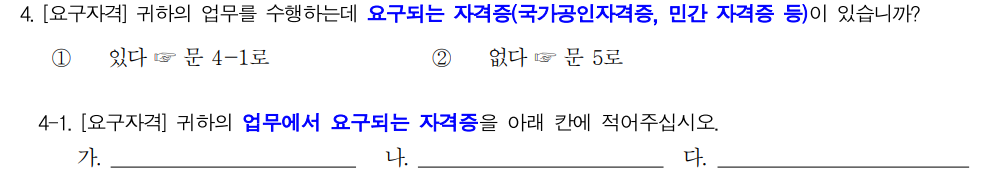

In [66]:
Image('./image/2017bq4_1.PNG')

없을 경우 빈 칸으로 하였을 것이므로 bq4_1a, bq4_1b, bq4_1c는 없음으로 대체

In [67]:
know_2017.loc[(know_2017['bq4'] == 2) & (know_2017['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2017_test.loc[(know_2017_test['bq4'] == 2) & (know_2017_test['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2017.loc[(know_2017['bq4'] == 2) & (know_2017['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2017_test.loc[(know_2017_test['bq4'] == 2) & (know_2017_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2017.loc[(know_2017['bq4'] == 2) & (know_2017['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2017_test.loc[(know_2017_test['bq4'] == 2) & (know_2017_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [68]:
#빈칸들은 다 없음으로 판단

know_2017.loc[(know_2017['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2017_test.loc[(know_2017_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2017.loc[(know_2017['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2017_test.loc[(know_2017_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [69]:
print(sum(know_2017['bq4_1a'].isnull()))
print(sum(know_2017['bq4_1b'].isnull()))
print(sum(know_2017['bq4_1c'].isnull()))
print(sum(know_2017_test['bq4_1a'].isnull()))
print(sum(know_2017_test['bq4_1b'].isnull()))
print(sum(know_2017_test['bq4_1c'].isnull()))

0
0
0
0
0
0


#### bq5

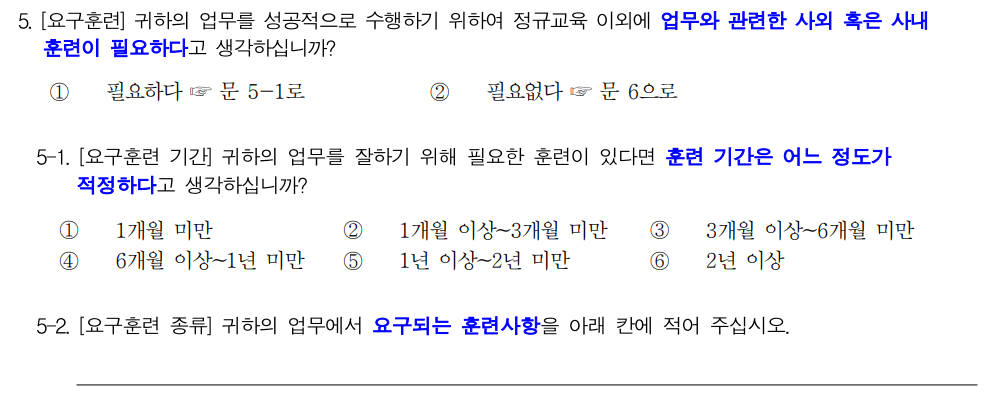

In [70]:
Image('./image/2017bq5.PNG')

필요없다고 생각한 사람들이 결측치로 남겨놨을 확률이 높으므로 5-1의 경우에는 0으로, 5-2는 없음으로 한다.

In [71]:
know_2017.loc[(know_2017['bq5_1'].isnull()), 'bq5_1'] = 0
know_2017_test.loc[(know_2017_test['bq5_1'].isnull()), 'bq5_1'] = 0
know_2017.loc[(know_2017['bq5_2'].isnull()), 'bq5_2'] = '없다'
know_2017_test.loc[(know_2017_test['bq5_2'].isnull()), 'bq5_2'] = '없다'

print(sum(know_2017['bq5_1'].isnull()))
print(sum(know_2017['bq5_2'].isnull()))
print(sum(know_2017_test['bq5_1'].isnull()))
print(sum(know_2017_test['bq5_2'].isnull()))

0
0
0
0


In [72]:
know_2017['bq5_2']

0                     실무교육
1                       없다
2                       없다
3           측량 및 정보통신기술 교육
4                       없다
               ...        
9481        편집기술에 원리와 이해능력
9482    도면 작성 교육, 전자 기초 이해
9483                    없다
9484                    없다
9485                    없다
Name: bq5_2, Length: 9486, dtype: object

#### bq12

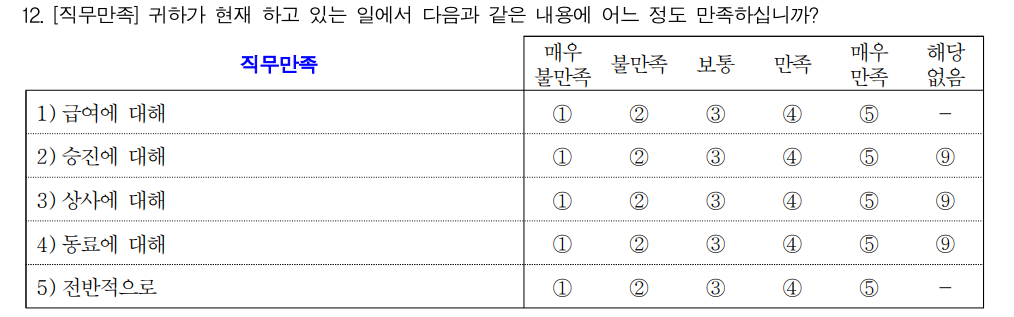

In [73]:
Image('./image/2017bq12.PNG')

12_2, 12_3, 12_4에 결측치가 존재한다.

승진 같은 경우에는 10번 문항의 발전가능성을 토대로,

상사 동료 같은 경우에는 11번 문항의 근무 조건을 고려하겠다.

##### bq12_2 

In [74]:
know_2017.loc[know_2017['bq12_2'].isnull(),'bq10'].describe()

count    1630.000000
mean        3.600613
std         0.842035
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: bq10, dtype: float64

In [75]:
know_2017.loc[know_2017['bq12_2'].isnull(),'bq12_2']=3.6
know_2017_test.loc[know_2017_test['bq12_2'].isnull(),'bq12_2']=3.6

print(sum(know_2017['bq12_2'].isnull()))
print(sum(know_2017_test['bq12_2'].isnull()))

0
0


##### bq12_3

In [76]:
know_2017.loc[know_2017['bq12_3'].isnull(),'bq11'].describe()

count    1343.000000
mean        3.069248
std         0.923513
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: bq11, dtype: float64

In [77]:
know_2017.loc[know_2017['bq12_3'].isnull(),'bq12_3']=3.06
know_2017_test.loc[know_2017_test['bq12_3'].isnull(),'bq12_3']=3.06

print(sum(know_2017['bq12_3'].isnull()))
print(sum(know_2017_test['bq12_3'].isnull()))

0
0


#### bq12_4

In [78]:
know_2017.loc[know_2017['bq12_4'].isnull(),'bq11'].describe()

count    879.000000
mean       3.010239
std        0.928484
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: bq11, dtype: float64

In [79]:
know_2017.loc[know_2017['bq12_4'].isnull(),'bq12_4']=3.01
know_2017_test.loc[know_2017_test['bq12_4'].isnull(),'bq12_4']=3.01

print(sum(know_2017['bq12_4'].isnull()))
print(sum(know_2017_test['bq12_4'].isnull()))

0
0


#### bq19_1

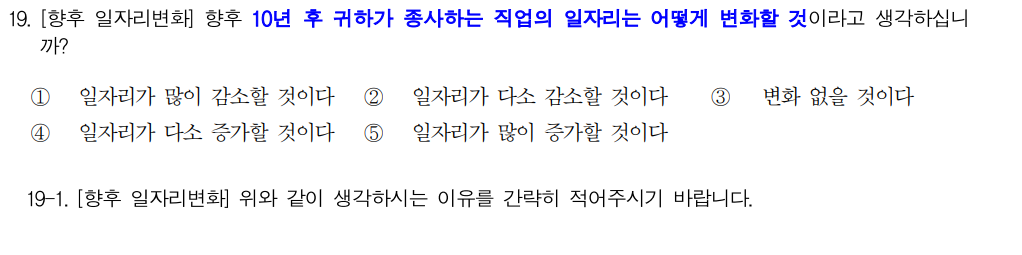

In [80]:
Image('./image/2017bq19_1.PNG')

그냥 bq19_1 컬럼을 사용하지 않겠다.

In [81]:
know_2017 = know_2017.drop(columns = ['bq19_1'])
know_2017_test = know_2017_test.drop(columns = ['bq19_1'])

#### bq 30

30. [유사직업명] 현장에서 귀하의 직업을 달리 부르는 명칭이 있다면 있는 대로 적어주시기 바랍니다.
※ 예) 택시운전원을 현장에서는 택시기사 등으로 부릅니다.

In [82]:
know_2017.loc[know_2017['bq30'].isnull(),'bq30'] = '없다'
know_2017_test.loc[know_2017_test['bq30'].isnull(),'bq30'] = '없다'

In [83]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq31', 'bq32', 'bq33', 'bq34', 'bq38_1', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']


#### bq 31, bq 32

31. [사용하는 도구 및 프로그램명] 현장에서 귀하의 업무에 전문적으로 활용하는 도구나 프로그램이 있으면
있는 대로 적어주시기 바랍니다.
※ 예) 미용사 – 미용도구(클리퍼, 아이롱)
회계사 – 전산회계프로그램(더존, 리버스알파) 

32. [직전직업] 귀하의 직전 직업을 적어주시기 바랍니다.

In [84]:
know_2017 = know_2017.drop(columns = [ 'bq31'])
know_2017_test = know_2017_test.drop(columns = [ 'bq31'])

In [85]:
know_2017.loc[know_2017['bq32'].isnull(),'bq32']='없다'
know_2017_test.loc[know_2017_test['bq32'].isnull(),'bq32']='없다'
print(sum(know_2017['bq32'].isnull()))
print(sum(know_2017_test['bq32'].isnull()))

0
0


#### bq33, bq 34

33. [전직 가능직업] 귀하가 현재 직업의 경력을 잘 활용하여 전직 가능한 직업이 있다면 적어주기 바랍니다.
※ 경력개발 후 전직이 가능한 직업이 있는지 여부를 묻는 문항으로 실제 전직여부와는 무관합니다.

34. [신직업 발굴] 귀하가 현재 하고 있는 일과 관련하여 주변에 새롭게 생겨나고 있는 신직업(또는 새로운
직무)이 있다면 어떤 것이 있는지 자유롭게 말씀해 주십시오.(해당자만 응답)

In [86]:
for col in ['bq33','bq34']:
  know_2017.loc[know_2017[col].isnull(),col]='없다'
  know_2017_test.loc[know_2017_test[col].isnull(),col]='없다'
  print(sum(know_2017[col].isnull()))
  print(sum(know_2017_test[col].isnull()))

0
0
0
0


#### bq 38_1

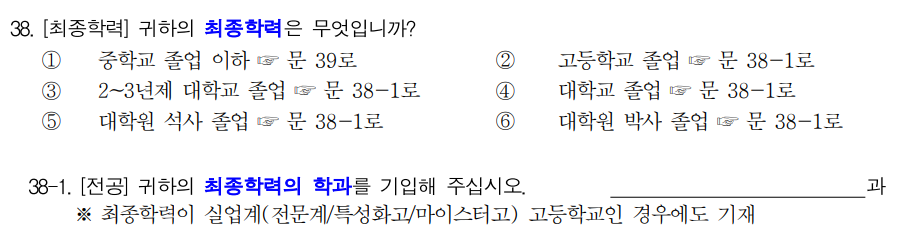

In [87]:
Image('./image/2017bq38.PNG')

38 물음에서 1번을 택했으면 없을 것이다.

In [88]:
know_2017.loc[know_2017['bq38_1'].isnull(),'bq38_1'] = '중졸이하'
know_2017_test.loc[know_2017_test['bq38_1'].isnull(),'bq38_1'] = '중졸이하'

#### bq40

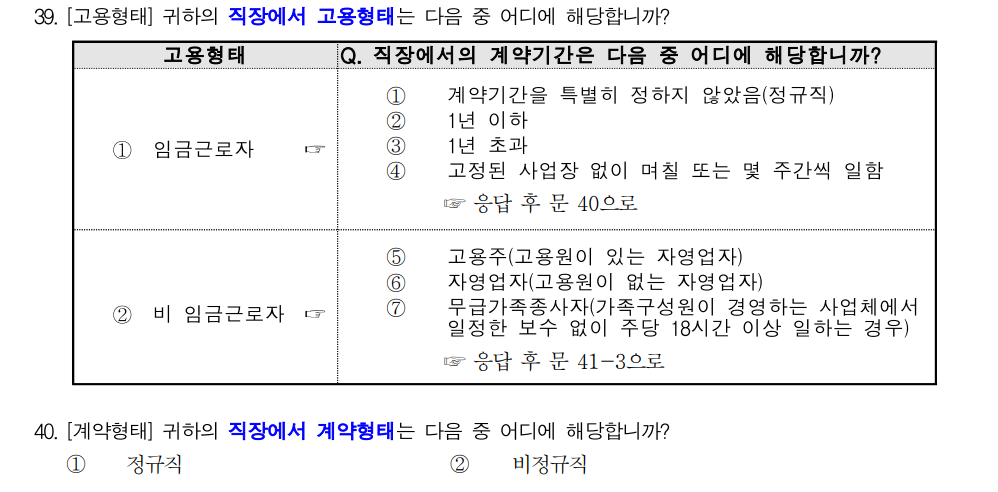

In [89]:
Image('./image/2017bq40.PNG')

39에서 비 임금근로자들이 지나쳤을기에 0으로 대체하겠다.

In [90]:
know_2017.loc[know_2017['bq40'].isnull(),'bq40'] = 0
know_2017_test.loc[know_2017_test['bq40'].isnull(),'bq40'] = 0

#### bq41

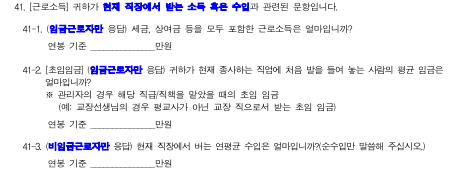

In [91]:
Image('./image/2017bq41.PNG')

In [92]:
know_2017 = know_2017.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])
know_2017_test = know_2017_test.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])

In [93]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2017.isnull().sum().index, know_2017.isnull().sum(), know_2017_test.isnull().sum().index, know_2017_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

[]
[]


결측치들을 제거 완료하였다.

### object들 labelencoder로 처리

In [94]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in know_2017.columns:
  if col == 'ID':
    continue
        
  try:
    know_2017[col] = know_2017[col].map(int)
  except:
    encoder = LabelEncoder()
    know_2017[col] = know_2017[col].map(str)
    know_2017[col] = encoder.fit_transform(know_2017[col])
    encoders[col] = encoder

In [95]:
for col in know_2017_test.columns:
  if col == 'ID':
    continue     
  try:
    know_2017_test[col] = know_2017_test[col].map(int)
  except:
    encoder = encoders[col]
    know_2017_test[col] = know_2017_test[col].map(str)
    category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
    know_2017_test[col] = know_2017_test[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리        

## 3.3 feature, label 구분

In [96]:
X_train=know_2017.drop(['idx','knowcode'],axis=1)
y_train=know_2017['knowcode']

In [97]:
X_test=know_2017_test.drop(['idx'],axis=1)

# 4. Modeling

In [98]:
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(random_state=123)

In [99]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

In [100]:
# X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.3)

In [101]:
# model.fit(X_tr,y_tr)

In [102]:
# pred=model.predict(X_val)
# f1_score(y_val,pred,average='macro')

In [103]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [104]:
from catboost import CatBoostClassifier

In [105]:
model=CatBoostClassifier(iterations=500,random_state=123)

model.fit(X_train,y_train)

Learning rate set to 0.159413
0:	learn: 6.1311286	total: 20.5s	remaining: 2h 50m 14s
1:	learn: 6.0205591	total: 39.1s	remaining: 2h 42m 27s
2:	learn: 5.8604765	total: 50.9s	remaining: 2h 20m 32s
3:	learn: 5.7531552	total: 1m 2s	remaining: 2h 9m 24s
4:	learn: 5.6642847	total: 1m 14s	remaining: 2h 2m 36s
5:	learn: 5.5812212	total: 1m 25s	remaining: 1h 57m 52s
6:	learn: 5.5102571	total: 1m 37s	remaining: 1h 54m 30s
7:	learn: 5.4333449	total: 1m 49s	remaining: 1h 52m 2s
8:	learn: 5.3033436	total: 2m 1s	remaining: 1h 50m 2s
9:	learn: 5.2207860	total: 2m 13s	remaining: 1h 48m 47s
10:	learn: 5.1231746	total: 2m 25s	remaining: 1h 47m 34s
11:	learn: 5.0029621	total: 2m 37s	remaining: 1h 46m 30s
12:	learn: 4.9384107	total: 2m 49s	remaining: 1h 46m 8s
13:	learn: 4.8555252	total: 3m 2s	remaining: 1h 45m 20s
14:	learn: 4.7588305	total: 3m 13s	remaining: 1h 44m 30s
15:	learn: 4.6915923	total: 3m 25s	remaining: 1h 43m 49s
16:	learn: 4.6223046	total: 3m 37s	remaining: 1h 43m 11s
17:	learn: 4.5270992	t

In [106]:
pred=model.predict(X_test)

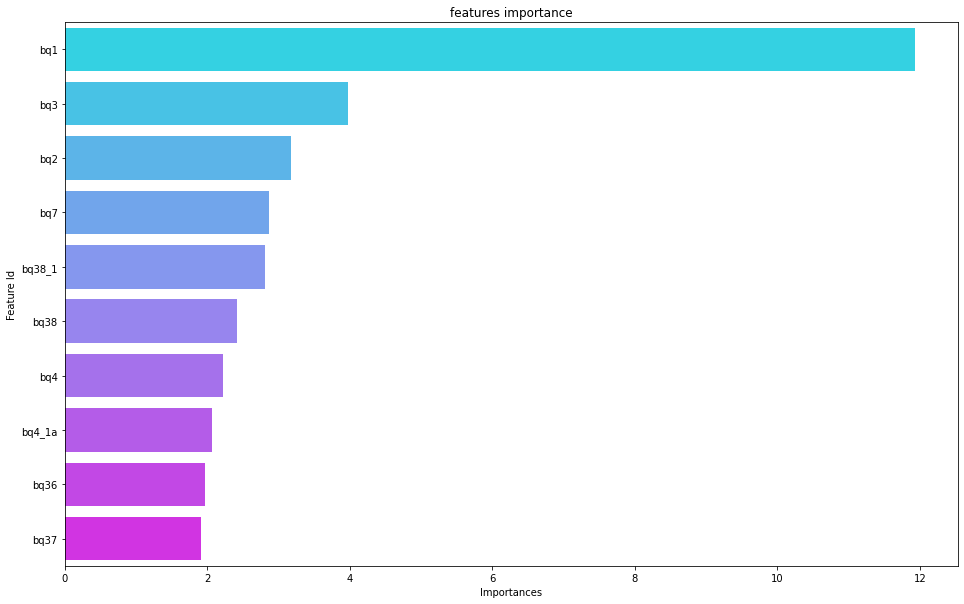

In [111]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(model.get_feature_importance(prettified=True)[:10])
#plotting feature importance
plt.figure(figsize=(16, 10));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [108]:
pd.DataFrame(pred).to_csv('2017.csv',index=False)